In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, metrics
from random import randint

In [103]:
print('OpenCV Version : %s ' % cv2.__version__)

OpenCV Version : 3.1.0 


<class 'numpy.ndarray'>
(1000, 2000)


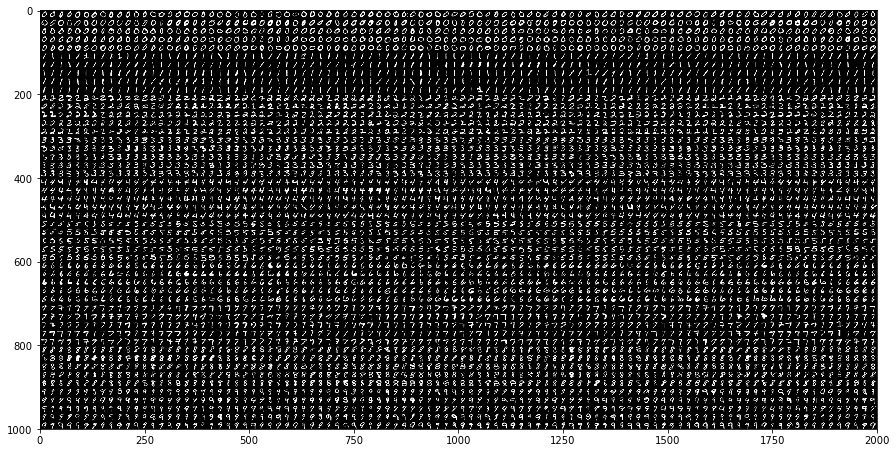

In [104]:
digits = cv2.imread('data/digits.png', cv2.IMREAD_GRAYSCALE)
print(type(digits))
print(digits.shape)
plt.figure(1, figsize=(15, 15))
plt.imshow(digits, cmap='gray')
plt.show()

In [105]:
# 1 digit = 20x20 [H x W]
# 1 row = 100 digits = 20x100 = 2000 pixel
# 50 rows = 20x50 = 1000 pixel
data_set = [np.vsplit(row, 50) for row in np.hsplit(digits, 100)] # 100 column x 50 rows = 5,000 samples
data_set = np.array(data_set).reshape(-1, 400) # each digit has 20 x 20 = 400
print('Total samples : %s' %len(data_set))
print('Data for each digit : %s' %len(data_set[0])) # each digit has 20 x 20 = 400

Total samples : 5000
Data for each digit : 400


In [124]:
rand_digit = np.array(data_set[randint(0, 4999)]).reshape(20,20)
print(rand_digit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0  56 107 147 187 129  12   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   9 127 235 255 255 255 255 191  42   0
    0   0]
 [  0   0   0   0   0   0   0  11 144 255 255 240 250 239 253 255  85   0
    0   0]
 [  0   0   0   0   0   0  10 135 255 234 103  25  30  35 132 183  46   0
    0   0]
 [  0   0   0   0   0   3 140 255 244  85   0   0  24 167 172   0   0   0
    0   0]
 [  0   0   0   0   0  77 249 246 102   0   0   0 151 255 136   0   0   0
    0   0]
 [  0   0   0   0   2 179 255 170   0   0  19 136 255 252  68   0   0   0
    0   0]
 [  0   0   0   0   6 210 255 190 107 136 196 251 255 161   8   0

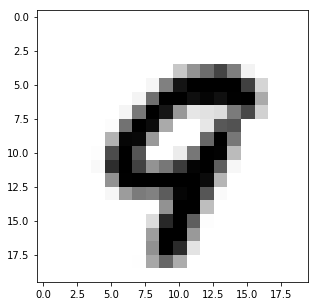

In [125]:
plt.figure(figsize=(5, 5))
plt.imshow(rand_digit, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [108]:
target = np.tile(np.repeat(np.arange(10),5),50)
len(target)

2500